In [37]:
import gzip
import pyfpgrowth 
import matplotlib.pyplot as plt
import networkx as nx

In [23]:
file_path = 'roadNet-TX.txt.gz'

In [24]:
print("开始读取有向图数据...")
# 读取有向图数据
edges = []
with gzip.open(file_path, 'rt') as file:
    for line in file:
        if not line.startswith('#'):
            source, target = map(int, line.strip().split())
            edges.append((source, target))
print("完成")

开始读取有向图数据...
完成


In [27]:
print("开始构建有向图...")
# 构建有向图
G = nx.DiGraph(edges)
print("完成")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

开始构建有向图...
完成
Number of nodes: 1379917
Number of edges: 3843320


In [54]:
# 获取节点的度
node_degrees = dict(G.degree())
# 根据节点的度过滤节点
filtered_nodes = [node for node, degree in node_degrees.items() if degree > 8]
# 构建新的图
G_filtered = G.subgraph(filtered_nodes)
print("Number of nodes in filtered graph:", G_filtered.number_of_nodes())
print("Number of edges in filtered graph:", G_filtered.number_of_edges())

Number of nodes in filtered graph: 6525
Number of edges in filtered graph: 1212


In [55]:

# 将有向图转换为事务列表
transactions = [[str(edge[0]), str(edge[1])] for edge in G_filtered.edges()]
print("完成")

完成


In [56]:
# 使用FP-Growth算法进行频繁模式挖掘
patterns = pyfpgrowth.find_frequent_patterns(transactions, 0.1)
print("完成")

完成


开始可视化展示...


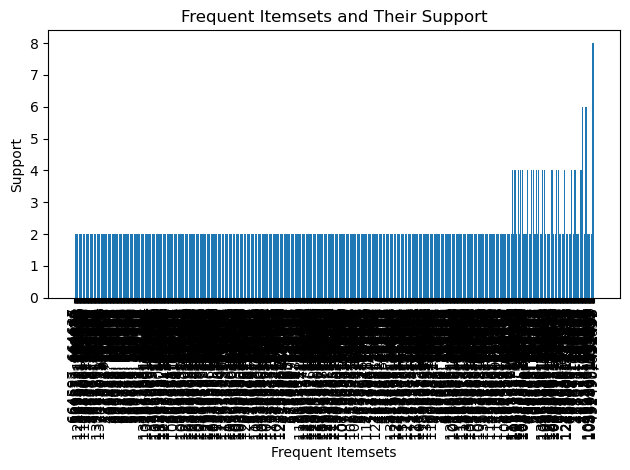

完成


In [64]:
# 可视化频繁模式挖掘结果
print("开始可视化展示...")
plt.bar(range(len(patterns) // 2, len(patterns)), list(patterns.values())[len(patterns) // 2:], tick_label=[', '.join(pattern) for pattern in list(patterns.keys())[len(patterns) // 2:]])
plt.xlabel('Frequent Itemsets')
plt.xlabel('Frequent Itemsets')
plt.ylabel('Support')
plt.title('Frequent Itemsets and Their Support')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("完成")

In [58]:
print("频繁模式挖掘结果：")
print(patterns)

频繁模式挖掘结果：
{('131086',): 2, ('131025', '131086'): 2, ('131025',): 2, ('163963',): 2, ('163963', '163980'): 2, ('163980',): 2, ('524432',): 2, ('524432', '524433'): 2, ('524433',): 2, ('229844',): 2, ('229844', '229845'): 2, ('229845',): 2, ('295421',): 2, ('295421', '295422'): 2, ('295422',): 2, ('950798',): 2, ('950798', '951086'): 2, ('951086',): 2, ('131673',): 2, ('131673', '131697'): 2, ('131697',): 2, ('492229',): 2, ('492229', '492263'): 2, ('492263',): 2, ('1246056',): 2, ('1246056', '1246060'): 2, ('1245170',): 2, ('1245170', '1246060'): 2, ('459697',): 2, ('459697', '464687'): 2, ('464687',): 2, ('295879',): 2, ('295879', '296227'): 2, ('296227',): 2, ('1246187',): 2, ('1246187', '1246200'): 2, ('1246200',): 2, ('1049952',): 2, ('1049952', '1049969'): 2, ('1049969',): 2, ('230804',): 2, ('230804', '230805'): 2, ('230805',): 2, ('525736',): 2, ('525736', '525762'): 2, ('525762',): 2, ('230830',): 2, ('230830', '230831'): 2, ('230831',): 2, ('1083170',): 2, ('1068296', '1083170'

In [65]:
# 找出支持度最高的频繁模式
highest_support_pattern = max(patterns, key=patterns.get)
print("支持度最高的频繁模式:", highest_support_pattern)

支持度最高的频繁模式: ('452497',)


In [ ]:
#命名为 "道路交叉模式"。因为有向图的节点表示道路的端点，而频繁模式 ('452497',) 可能表示了一种特定的道路交叉情况，即节点 452497 是一个交叉点，道路在此处交叉。